In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
bikes= pd.read_csv("bike.csv",encoding= 'unicode_escape')
bikes.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
bikes=bikes.dropna()
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Os modelos de predição utilizados serão: Regressão Multipla e 


1. REGRESSÃO MULTIPLA


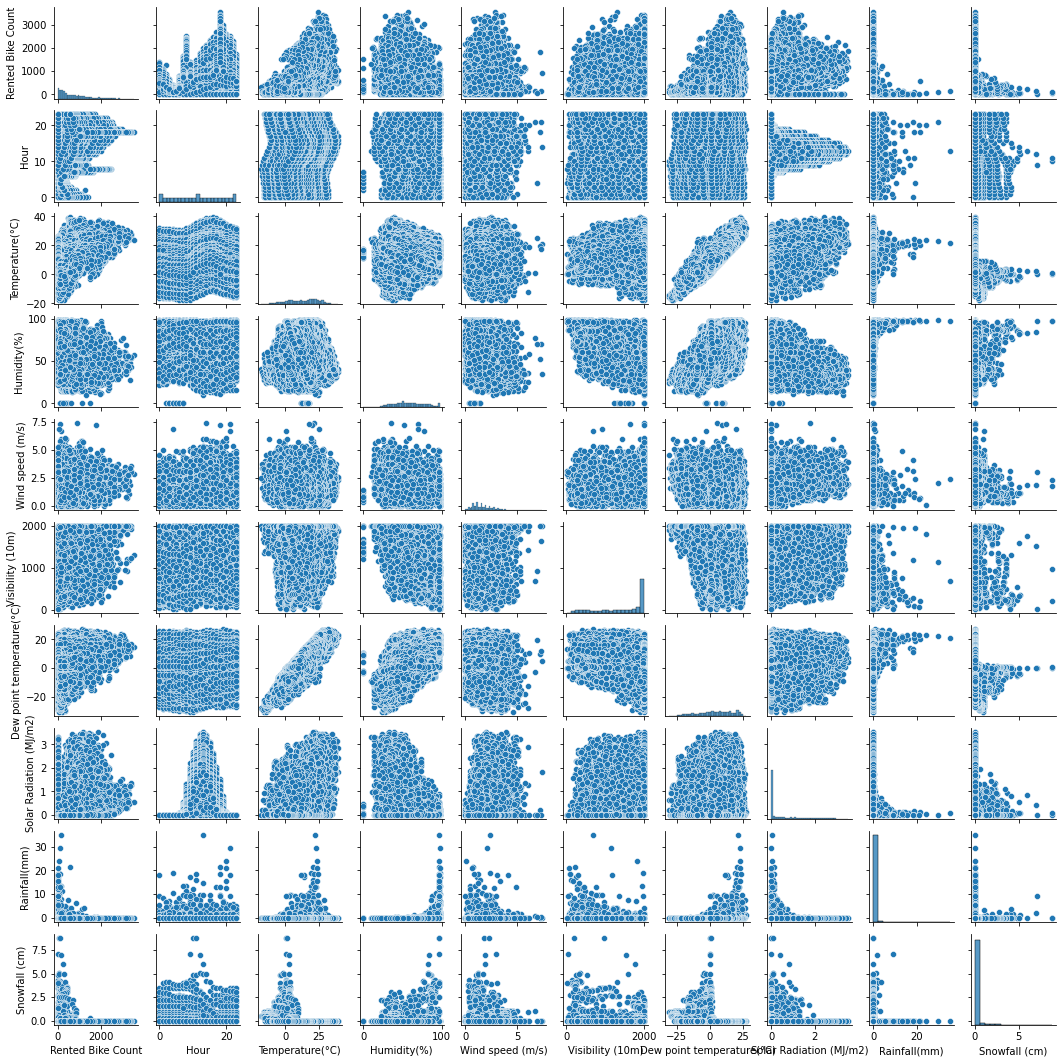

In [5]:
import seaborn as sns
sns.pairplot(bikes, height=1.5);

In [10]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
def regress(Y,X):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [11]:
X = bikes[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]]
Y = bikes['Rented Bike Count']
results = regress(Y,X)
results.summary()

/Users/marinalebl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     864.1
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:25:53   Log-Likelihood:                -66315.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8750   BIC:                         1.327e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       548.8536    100.050      5.486      0.000     352.731     744.976
Hour                         27.3155      0.789     34.642      0.000      25.770      28.861
Temperature(°C)              26.5793      3.920      6.780      0.000      18.895      34.264
Humidity(%)                  -8.8115      1.112     -7.925      0.000     -10.991      -6.632
Wind speed (m/s)              6.9221      5.469      1.266      0.206      -3.799      17.643
Visibility (10m)              0.0213      0.010      2.062      0.039       0.001       0.042
Dew point temperature(°C)     5.4131      4.132      1.310      0.190      -2.686      13.513
Solar Radiation (MJ/m2)     -79.3428      8.210     -9.664      0.000     -95.437     -63.248
Rainfall(mm)                -58.8069      4.631    -12.699      0.000     -67.885     -49.729
Snowfall (cm)                21.0770     12.023      1.753      0.080      -2.491      44.645
==============================================================================
Omnibus:                      947.548   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1824.527
Skew:                           0.710   Prob(JB):                         0.00
Kurtosis:                       4.727   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X = bikes[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Dew point temperature(°C)', "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]]
Y = bikes['Rented Bike Count']
results = regress(Y,X)
results.summary()

/Users/marinalebl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     971.9
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:27:59   Log-Likelihood:                -66315.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8751   BIC:                         1.327e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       553.5372     99.985      5.536      0.000     357.542     749.532
Hour                         27.5554      0.765     36.001      0.000      26.055      29.056
Temperature(°C)              26.6755      3.920      6.806      0.000      18.992      34.359
Humidity(%)                  -8.7875      1.112     -7.904      0.000     -10.967      -6.608
Visibility (10m)              0.0222      0.010      2.151      0.031       0.002       0.042
Dew point temperature(°C)     5.2046      4.129      1.261      0.207      -2.889      13.298
Solar Radiation (MJ/m2)     -76.8575      7.973     -9.640      0.000     -92.486     -61.230
Rainfall(mm)                -58.5739      4.627    -12.658      0.000     -67.645     -49.503
Snowfall (cm)                21.1149     12.023      1.756      0.079      -2.454      44.684
==============================================================================
Omnibus:                      951.202   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1836.401
Skew:                           0.711   Prob(JB):                         0.00
Kurtosis:                       4.734   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X = bikes[['Hour', 'Temperature(°C)', 'Humidity(%)',  'Visibility (10m)', "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]]
Y = bikes['Rented Bike Count']
results = regress(Y,X)
results.summary()

/Users/marinalebl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1110.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:28:37   Log-Likelihood:                -66316.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8752   BIC:                         1.327e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     435.9484     35.995     12.112      0.000     365.391     506.506
Hour                       27.5028      0.764     35.985      0.000      26.005      29.001
Temperature(°C)            31.5713      0.529     59.628      0.000      30.533      32.609
Humidity(%)                -7.4759      0.392    -19.091      0.000      -8.244      -6.708
Visibility (10m)            0.0232      0.010      2.258      0.024       0.003       0.043
Solar Radiation (MJ/m2)   -79.2173      7.750    -10.222      0.000     -94.409     -64.026
Rainfall(mm)              -59.2450      4.597    -12.888      0.000     -68.256     -50.234
Snowfall (cm)              20.0911     11.996      1.675      0.094      -3.425      43.607
==============================================================================
Omnibus:                      955.545   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1843.800
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                       4.735   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X = bikes[['Hour', 'Temperature(°C)', 'Humidity(%)',  'Visibility (10m)', "Solar Radiation (MJ/m2)", "Rainfall(mm)"]]
Y = bikes['Rented Bike Count']
results = regress(Y,X)
results.summary()

/Users/marinalebl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:28:58   Log-Likelihood:                -66318.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8753   BIC:                         1.327e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     433.3763     35.965     12.050      0.000     362.876     503.877
Hour                       27.5718      0.763     36.124      0.000      26.076      29.068
Temperature(°C)            31.3450      0.512     61.222      0.000      30.341      32.349
Humidity(%)                -7.3768      0.387    -19.054      0.000      -8.136      -6.618
Visibility (10m)            0.0230      0.010      2.236      0.025       0.003       0.043
Solar Radiation (MJ/m2)   -77.8478      7.707    -10.100      0.000     -92.956     -62.739
Rainfall(mm)              -59.4272      4.596    -12.930      0.000     -68.437     -50.418
==============================================================================
Omnibus:                      954.244   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1836.582
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                       4.729   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X = bikes[['Hour', 'Temperature(°C)', 'Humidity(%)',   "Solar Radiation (MJ/m2)", "Rainfall(mm)"]]
Y = bikes['Rented Bike Count']
results = regress(Y,X)
results.summary()

/Users/marinalebl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1552.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:29:13   Log-Likelihood:                -66320.
No. Observations:                8760   AIC:                         1.327e+05
Df Residuals:                    8754   BIC:                         1.327e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     495.0175     23.103     21.426      0.000     449.730     540.305
Hour                       27.4381      0.761     36.051      0.000      25.946      28.930
Temperature(°C)            31.6373      0.495     63.897      0.000      30.667      32.608
Humidity(%)                -7.8651      0.320    -24.600      0.000      -8.492      -7.238
Solar Radiation (MJ/m2)   -82.0301      7.479    -10.968      0.000     -96.690     -67.370
Rainfall(mm)              -59.8069      4.594    -13.018      0.000     -68.812     -50.802
==============================================================================
Omnibus:                      958.514   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1839.402
Skew:                           0.718   Prob(JB):                         0.00
Kurtosis:                       4.726   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variáveis explicativas: Hour, Temperature(°C), Humidity(%),  Solar Radiation (MJ/m2), Rainfall(mm).

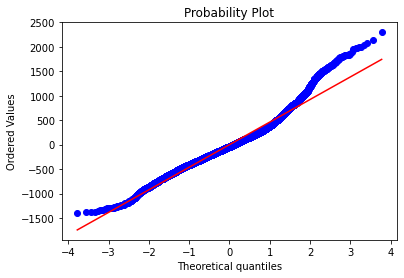

In [17]:
from scipy.stats import norm, probplot
import matplotlib.pyplot as plt
from math import sqrt, ceil
%matplotlib inline
probplot(results.resid, dist=norm, plot=plt);

2. 